## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [1]:
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


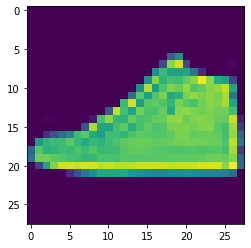

In [4]:
plt.imshow(train_imagef[1501,:,:])
plt.show()

In [5]:
train_labelf[:7]

array([9, 0, 0, 3, 0, 2, 7], dtype=uint8)

In [6]:
# Normalize the images.
train_imagef = (train_imagef / 127) - 1
test_imagef = (test_imagef / 127) - 1

In [7]:
# Flatten the images.
train_imagef = train_imagef.reshape((-1, 784))
test_imagef = test_imagef.reshape((-1, 784))

print(train_imagef.shape) # (60000, 784)
print(test_imagef.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [8]:
y_t = to_categorical(train_labelf)
y_tt = to_categorical(test_labelf)

In [9]:
results = {
    'neuron_numb': [],
    'epochs_numb': [],
    'layers_numb': [],
    'accuracy': [],
    'val_accuracy': [],
    'optimizer': [],
}

In [10]:
# Кол-во нейронов в исходящем слое равно кол-ву классов
my_set = set(train_labelf)
my_set

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [42]:
def create_fit_model(results, layers_numb, epochs_numb, neuron_numb_list):
  # Build the model.
  # neuron_numb_list = []
  model = Sequential(name='my_model')
  model.add(Dense(128, activation='relu', input_shape=(784,)))
  for k in range(layers_numb):
    # neuron_numb = 20+(10-k)*10
    # neuron_numb_list.append(neuron_numb)
    neuron_numb = neuron_numb_list[k]
    print(f'Слой {k} кол-во нейронов {neuron_numb}')
    model.add(Dense(neuron_numb, activation='tanh'))

  model.add(Dense(10, activation='softmax')) 

  # Compile the model.
  model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

  # Train the model.
  hh = model.fit(  
    train_imagef[:,:],
    y_t[:,:],
    epochs=epochs_numb,
    batch_size=32, validation_split=0.2
  )

  # Evaluate the model.
  model.evaluate( 
    test_imagef,
    y_tt
  )

  results['neuron_numb'].append(neuron_numb_list)
  results['epochs_numb'].append(epochs_numb)
  results['layers_numb'].append(layers_numb)
  results['optimizer'].append('adam')
  results['accuracy'].append(hh.history['accuracy'][-1])
  results['val_accuracy'].append(hh.history['val_accuracy'][-1])
 
  return hh, model

index=0
Слой 0 кол-во нейронов 110
Слой 1 кол-во нейронов 100
Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6209 - accuracy: 0.7765 - val_loss: 0.4313 - val_accuracy: 0.8365
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3987 - accuracy: 0.8526 - val_loss: 0.3805 - val_accuracy: 0.8644
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3408 - accuracy: 0.8747 - val_loss: 0.3635 - val_accuracy: 0.8668
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3283 - accuracy: 0.8778 - val_loss: 0.3682 - val_accuracy: 0.8637
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3066 - accuracy: 0.8869 - val_loss: 0.3362 - val_accuracy: 0.8802
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2876 - accuracy: 0.8930 - val_loss: 0.3603 - val_accuracy: 0.8734
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss

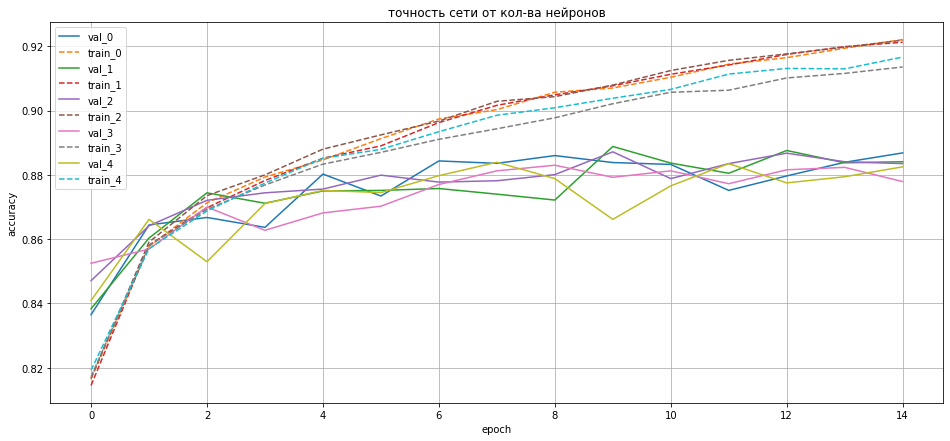

In [50]:
def test_params(params):
  plt.figure(figsize=(16,7))
  for index, param in params.iterrows():
    print(f'index={index}')
    hh, model = create_fit_model(results, param['layers_numb'], 
                    param['epochs_numb'], param['neuron_numb_list'])
    
    plt.plot(hh.history['val_accuracy'], '-', label=f'val_{index}')
    plt.plot(hh.history['accuracy'], '--', label=f'train_{index}')

  plt.legend()
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('точность сети от кол-ва нейронов')
  plt.grid()
  plt.show()

In [ ]:
params_dict = {'layers_numb': [3, 2, 2, 2, 2], 
     'epochs_numb': [15, 15, 15, 15, 15], 
     'neuron_numb_list': [
                          [110, 100], [130, 120], [140, 130], [50, 40], [75, 65]
                          ]}
params = pd.DataFrame(data=params_dict)
test_params()

In [ ]:
params_dict = {'layers_numb': [2, 2, 2, 2, 2], 
     'epochs_numb': [15, 15, 15, 15, 15], 
     'neuron_numb_list': [
                          [110, 100], [130, 120], [140, 130], [50, 40], [75, 65]
                          ]}
params = pd.DataFrame(data=params_dict)
test_params()

In [ ]:
create_fit_model(results, 3, 15, [110, 100, 90])
create_fit_model(results, 5, 15, [110, 100, 90, 80, 70])
create_fit_model(results, 10, 15, [110, 100, 90, 80, 70, 60, 50, 40, 30, 20])

Слой 0 кол-во нейронов 110
Слой 1 кол-во нейронов 100
Слой 2 кол-во нейронов 90
Слой 3 кол-во нейронов 80
Слой 4 кол-во нейронов 70
Epoch 1/15
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6531 - accuracy: 0.7723 - val_loss: 0.4473 - val_accuracy: 0.8389
Epoch 2/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4229 - accuracy: 0.8469 - val_loss: 0.3864 - val_accuracy: 0.8641
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8651 - val_loss: 0.4133 - val_accuracy: 0.8477
Epoch 4/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3591 - accuracy: 0.8704 - val_loss: 0.4157 - val_accuracy: 0.8482
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3346 - accuracy: 0.8767 - val_loss: 0.3591 - val_accuracy: 0.8699
Epoch 6/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3205 - accuracy: 0.8825 - val_loss: 0.3539 - val_accuracy: 0.8751
Epoc

In [52]:
# df_res_models = pd.DataFrame(data=results)
# df_res_models

#Ответ:

1.1 Оптимальной по val_accuracy оказалась модель с 110 на 100 нейронов в 2х скрытых слоях. Хотя остальные рез-ты рядом

1.2 Увеличение кол-ва слоев при том же количестве эпох только ухудшает рез-ты модели, как и при решении первого ДЗ напрашивается вывод что увеличивать нужно параллельно и кол-во эпох.

Особого преимущества от величения эпох до 30 и увеличения нейронов я не заметил.

In [ ]:
hh = model.fit(
  train_imagef,
  y_t,
  epochs=3,
  batch_size=1024, validation_split=0.2
)

Epoch 1/3
47/47 [==============================] - 1s 7ms/step - loss: 0.1095 - accuracy: 0.9604 - val_loss: 0.3656 - val_accuracy: 0.8911
Epoch 2/3
47/47 [==============================] - 0s 7ms/step - loss: 0.0875 - accuracy: 0.9702 - val_loss: 0.3661 - val_accuracy: 0.8926
Epoch 3/3
47/47 [==============================] - 0s 7ms/step - loss: 0.0805 - accuracy: 0.9733 - val_loss: 0.3682 - val_accuracy: 0.8929


In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(test_imagef[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labelf[:5]) #

[9 2 1 1 6]
[9 2 1 1 6]


Сохраним модель на диск

In [ ]:
# сохранить веса модели.
model.save_weights('model.h5')

# загрузить веса модели:
# model.load_weights('model.h5')

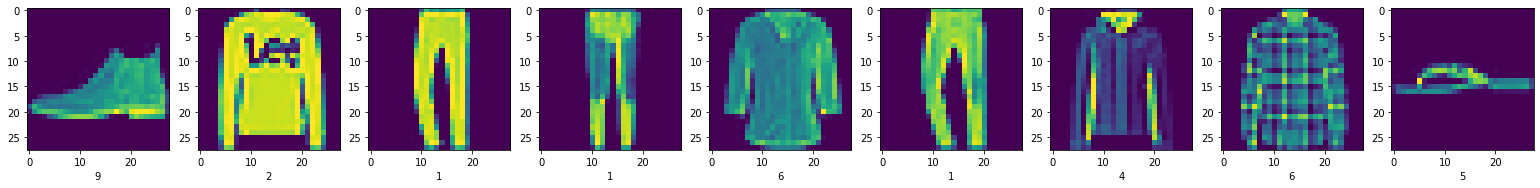

In [ ]:
N = 9
y_pred = model.predict(test_imagef[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_imagef[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show() 

In [ ]:
test_labelf[:N]

array([9, 2, 1, 1, 6, 1, 4, 6, 5], dtype=uint8)